In [1]:
import cv2
import numpy as np
from math import sqrt 
import numpy as np
from sys import exit
from PIL import Image
import matplotlib.pyplot as plt
import random

In [2]:
## definir les parametre 
patchSize = 27      # rectangular patch with size patchSize*patchSize*channel
patchPerImg = 1000  # patches dans une image
numImage = 20       # nombres des  images
totalPatch = patchPerImg * numImage
data = np.ones((totalPatch, patchSize, patchSize, 3), dtype='uint8') # all of the patches will be stored here
dataLoc = np.ones((totalPatch, 2), dtype='uint8') # location of the patches stores as (row, column)
dataLabel = np.ones((totalPatch), dtype='uint8') # label of the patches 0 - neg, 1 - pos

balance = 0.5 # balance between positive and negative patches
positive = int(patchPerImg * balance) # number of positive image in an image
negative = patchPerImg - positive # number of negative image in an image
## reading the image and mask
for i in range(1, numImage + 1):
    imgNum = str(i)
    if i < 10:
        imgNum = '0' + imgNum
    imgDir = "C:/Users/soltan/Desktop/project jupyter/DB"
    imgName = imgNum + '_test.tif'
    img = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/test/images/' + imgName)
    maskName = imgNum + '_test_mask.gif'
    mask = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/test/mask/' + maskName)
    gndTruthName = imgNum + '_manual1.gif'
    gndTruth = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/test/1st_manual/' + gndTruthName)
    ## converting them to numpy array
#     img = img.resize((32, 32))
#     img = np.array(img.convert('RGB'))
    img = np.array(img)
    
#     mask = mask.resize((32,32))
    mask.convert('RGB')
    mask = np.array(mask)

#     gndTruth = gndTruth.resize((32, 32))
    gndTruth = gndTruth.convert('RGB')
    gndTruth = np.array(gndTruth)[:,:,0]

    ## cutting out patches from the image
    imgRow = img.shape[0]
    imgCol = img.shape[1]
    count = 0
    ind = (i - 1) * patchPerImg
    posCount = 0
    negCount = 0
    while count < patchPerImg:
        r = int(round(random.uniform(0, img.shape[0])))
        c = int(round(random.uniform(0, img.shape[1])))
        rStart = r - patchSize // 2
        rEnd = r + patchSize // 2 + 1
        cStart = c - patchSize // 2
        cEnd = c + patchSize // 2 + 1
        if np.all(mask[rStart:rEnd, cStart:cEnd]) and r > 13 and r < imgRow - 14 and c > 13 and c < imgCol - 14:
            label = gndTruth[r, c]
            if label == 0:
                if negCount == negative:
                    continue
                else:
                    negCount += 1
            else:
                if posCount == positive:
                    continue
                else:
                    posCount += 1
            
            temp = img[rStart:rEnd, cStart:cEnd, :]
        
            data[ind + count] = temp
            dataLoc[ind + count] = np.array([r, c])
            dataLabel[ind + count] = label
            
            
            count += 1
    print("Loaded image ", i)              
print(negCount, posCount)
print(patchPerImg)
print(patchSize)
print(data.shape)
print(np.count_nonzero(dataLabel))
## storing the images and data THE DATA IS STORED IN RGB FORMAT
# Modify the following lines to save the data with the desired shapes
np.save('C:/Users/soltan/Desktop/project jupyter/DB/testData', data)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/testDataLcation',dataLoc)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/testDataLabel',dataLabel)

Loaded image  1
Loaded image  2
Loaded image  3
Loaded image  4
Loaded image  5
Loaded image  6
Loaded image  7
Loaded image  8
Loaded image  9
Loaded image  10
Loaded image  11
Loaded image  12
Loaded image  13
Loaded image  14
Loaded image  15
Loaded image  16
Loaded image  17
Loaded image  18
Loaded image  19
Loaded image  20
500 500
1000
27
(20000, 27, 27, 3)
10000


In [3]:
## defining parameters
patchSize = 27      # rectangular patch with size patchSize*patchSize*channel 
patchPerImg = 1000  # patches per image
numImage = 20       # number of images
totalPatch = patchPerImg * numImage
datat = np.ones((totalPatch, patchSize, patchSize, 3), dtype='uint8') # all of the patches will be stored here
dataLoct = np.ones((totalPatch, 2), dtype='uint8') # location of the patches stores as (row, column)
dataLabelt = np.ones((totalPatch), dtype='uint8') # label of the patches 0 - neg, 1 - pos

balance = 0.5 # balance between positive and negative patches
positive = int(patchPerImg * balance) # number of positive image in an image
negative = patchPerImg - positive # number of negative image in an image
## reading the image and mask
for i in range(1, numImage+1):
    imgNum = i
    if i < 22:
        imgNum = 20 + imgNum
    imgDir = "C:/Users/soltan/Desktop/project jupyter/DB"
    imgName = str(imgNum) + '_training.tif'
    img = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/training/images/' + imgName)
    maskName = str(imgNum) + '_training_mask.gif'
    mask = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/training/mask/' + maskName)
    gndTruthName = str(imgNum) + '_manual1.gif'
    gndTruth = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/training/1st_manual/' + gndTruthName)
#     plt.imshow(img)
#     plt.show()
#     plt.imshow(img)
#     plt.show()  
    ## converting them to numpy array
#     img = img.resize((32, 32))
#     img = np.array(img.convert('RGB'))
    img = np.array(img)
    
#     mask = mask.resize((32,32))
    mask.convert('RGB')
    mask = np.array(mask)

#     gndTruth = gndTruth.resize((32, 32))
    gndTruth = gndTruth.convert('RGB')
    gndTruth = np.array(gndTruth)[:,:,0]

    ## cutting out patches from the image
    imgRow = img.shape[0]
    imgCol = img.shape[1]
    count = 0
    ind = (i - 1) * patchPerImg
    posCount = 0
    negCount = 0
    while count < patchPerImg:
        r = int(round(random.uniform(0, img.shape[0])))
        c = int(round(random.uniform(0, img.shape[1])))
        rStart = r - patchSize // 2
        rEnd = r + patchSize // 2 + 1
        cStart = c - patchSize // 2
        cEnd = c + patchSize // 2 + 1
        if np.all(mask[rStart:rEnd, cStart:cEnd])  and r > 13 and r < imgRow - 14 and c > 13 and c < imgCol - 14:
            label = gndTruth[r, c]
            if label == 0:
                if negCount == negative:
                    continue
                else:
                    negCount += 1
            else:
                if posCount == positive:
                    continue
                else:
                    posCount += 1
            
            temp = img[rStart:rEnd, cStart:cEnd, :]
            datat[ind + count] = temp
            dataLoct[ind + count] = np.array([r, c])
            dataLabelt[ind + count] = label
            
            
            count += 1
    print("Loaded image ", i)   
print(len(datat))
print(negCount, posCount)
print(patchPerImg)
print(patchSize)
print(datat.shape)
print(np.count_nonzero(dataLabelt))
## storing the images and data THE DATA IS STORED IN RGB FORMAT
# Modify the following lines to save the data with the desired shapes
np.save('C:/Users/soltan/Desktop/project jupyter/DB/trainData', datat)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/trainDataLcation',dataLoct)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/trainDataLabel',dataLabelt)

Loaded image  1
Loaded image  2
Loaded image  3
Loaded image  4
Loaded image  5
Loaded image  6
Loaded image  7
Loaded image  8
Loaded image  9
Loaded image  10
Loaded image  11
Loaded image  12
Loaded image  13
Loaded image  14
Loaded image  15
Loaded image  16
Loaded image  17
Loaded image  18
Loaded image  19
Loaded image  20
20000
500 500
1000
27
(20000, 27, 27, 3)
10000


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sys import exit
from keras.applications import MobileNetV3Small, DenseNet121
from keras.layers import Input, Flatten, Dense, concatenate
from keras.models import Model

In [5]:
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/testData.npy'
data_test= np.load(dir)
data_test = data_test[..., 1]
print(data_test.shape)
data_test = data_test.astype('uint8')
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/testDataLabel.npy'
label_test = np.load(dir)
label_test =label_test.astype('uint8')
print(label_test.shape)
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/trainData.npy'
data_train= np.load(dir)
data_train = data_train[..., 1]
print(data_train.shape)
data_train = data_train.astype('uint8')
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/trainDataLabel.npy'
label_train = np.load(dir)
label_train = label_train.astype('uint8')
print(label_test.shape)

(20000, 27, 27)
(20000,)
(20000, 27, 27)
(20000,)


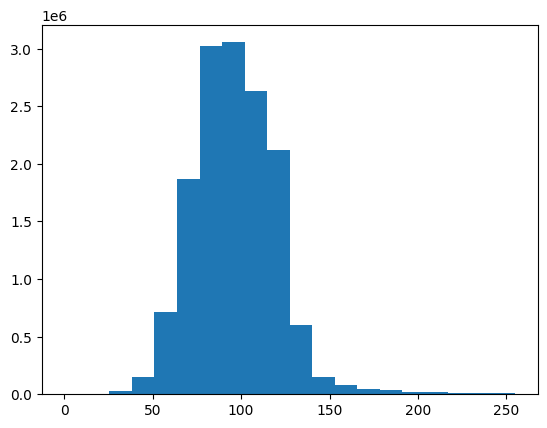

In [6]:
plt.hist(data_test.flatten(), bins = 20)
plt.show()

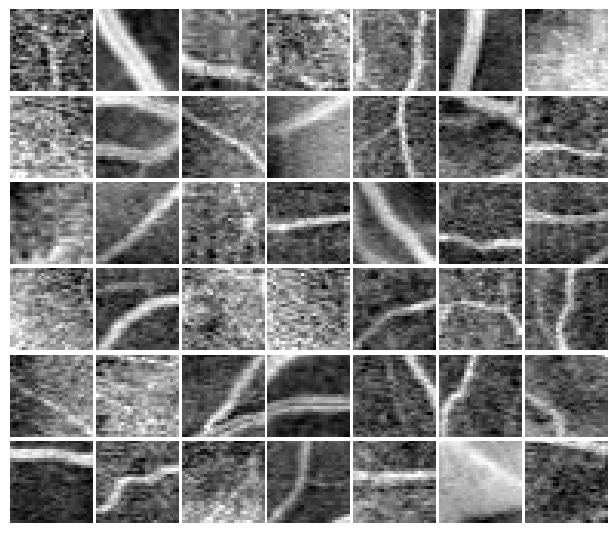

In [7]:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.005)

l = np.random.randint(0, 20000, size = 42)
for i, j in enumerate(l):
	ax = fig.add_subplot(7, 7, i + 1)
	ax.imshow(data_test[j], cmap = 'binary')
	plt.axis('off')
plt.show()

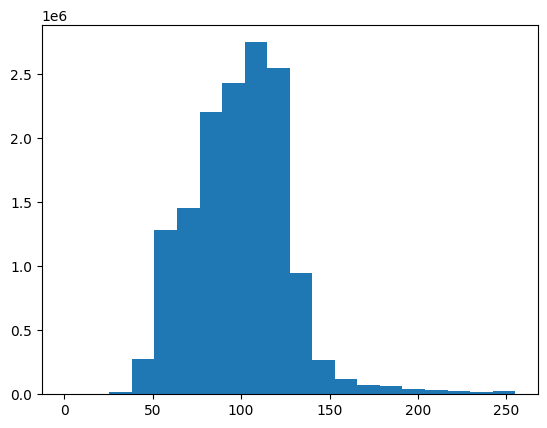

In [8]:
plt.hist(data_train.flatten(), bins = 20)
plt.show()

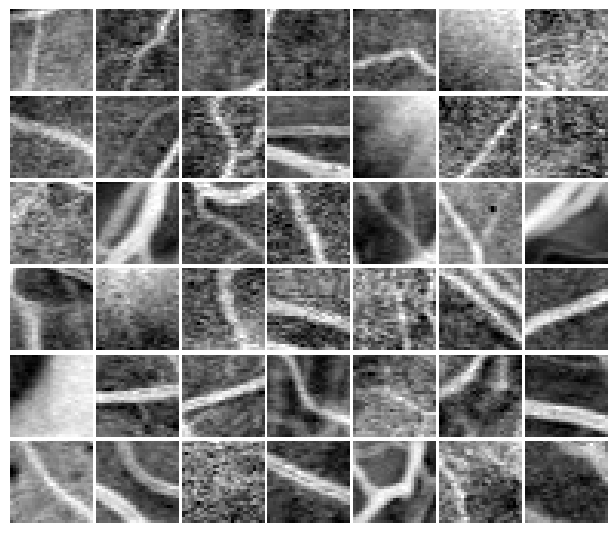

In [9]:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.005)

l = np.random.randint(0, 20000, size = 42)
for i, j in enumerate(l):
	ax = fig.add_subplot(7, 7, i + 1)
	ax.imshow(data_train[j], cmap = 'binary')
	plt.axis('off')
plt.show()

In [10]:
import numpy as np
from tensorflow.keras.applications.densenet import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras import regularizers
from sys import exit
import tensorflow as tf
from keras.applications import DenseNet121, MobileNetV3Large, InceptionV3
from keras.regularizers import l2
from keras.models import Model
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import  Input, Dense,Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, concatenate,Reshape

In [11]:
## reshaping and normalizing the data
## (33 * 33 * 3 = 3267) except green channel and clahe image (33 * 33 = 1089) 

x_train = data_train.reshape(20000,729).astype('float')
x_test = data_test.reshape(20000,729).astype('float')

x_train /= 255
x_test /= 255

## modifying the label as catagorical
label_train = (label_train / 255).astype('int')
y_train = np_utils.to_categorical(label_train, 2)

label_test = (label_test / 255).astype('int')
y_test = np_utils.to_categorical(label_test, 2)

In [12]:
## defining model
from keras.applications import MobileNetV3Small
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(2, input_dim = 729, activation = 'softmax', kernel_regularizer = regularizers.l2(0.0001)))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Entraîner le modèle sur les données d'entraînement
history = model.fit(x_train, y_train, batch_size=128, epochs=200,verbose = 1, shuffle = False, validation_data = (x_test, y_test),callbacks=[early_stopping])
## score the model 
score = model.evaluate(x_test, y_test, verbose = 0)
print(model.metrics_names, score)
score = model.evaluate(x_train, y_train, verbose = 0)
print(model.metrics_names, score)

Epoch 1/200
157/157 [==============================] - 2s 8ms/step - loss: 0.7215 - accuracy: 0.4141 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/200
157/157 [==============================] - 1s 6ms/step - loss: 0.7103 - accuracy: 0.3878 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/200
157/157 [==============================] - 1s 6ms/step - loss: 0.7070 - accuracy: 0.4151 - val_loss: 0.6906 - val_accuracy: 0.5001
Epoch 4/200
157/157 [==============================] - 1s 6ms/step - loss: 0.7037 - accuracy: 0.4402 - val_loss: 0.6876 - val_accuracy: 0.5005
Epoch 5/200
157/157 [==============================] - 1s 5ms/step - loss: 0.7004 - accuracy: 0.4678 - val_loss: 0.6846 - val_accuracy: 0.5016
Epoch 6/200
157/157 [==============================] - 1s 6ms/step - loss: 0.6972 - accuracy: 0.4891 - val_loss: 0.6818 - val_accuracy: 0.5027
Epoch 7/200
157/157 [==============================] - 1s 6ms/step - loss: 0.6941 - accuracy: 0.5099 - val_loss: 0.6789 - val_accuracy: 0.5048

Epoch 58/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5989 - accuracy: 0.7538 - val_loss: 0.5887 - val_accuracy: 0.7371
Epoch 59/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5978 - accuracy: 0.7546 - val_loss: 0.5876 - val_accuracy: 0.7398
Epoch 60/200
157/157 [==============================] - 1s 5ms/step - loss: 0.5967 - accuracy: 0.7556 - val_loss: 0.5865 - val_accuracy: 0.7424
Epoch 61/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5956 - accuracy: 0.7567 - val_loss: 0.5854 - val_accuracy: 0.7444
Epoch 62/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5945 - accuracy: 0.7576 - val_loss: 0.5844 - val_accuracy: 0.7463
Epoch 63/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5935 - accuracy: 0.7587 - val_loss: 0.5833 - val_accuracy: 0.7483
Epoch 64/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5924 - accuracy: 0.7601 - val_loss: 0.5823 - val_accuracy:

Epoch 115/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5544 - accuracy: 0.7848 - val_loss: 0.5430 - val_accuracy: 0.8043
Epoch 116/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5538 - accuracy: 0.7851 - val_loss: 0.5424 - val_accuracy: 0.8047
Epoch 117/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5533 - accuracy: 0.7855 - val_loss: 0.5418 - val_accuracy: 0.8055
Epoch 118/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5528 - accuracy: 0.7857 - val_loss: 0.5413 - val_accuracy: 0.8059
Epoch 119/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5522 - accuracy: 0.7859 - val_loss: 0.5407 - val_accuracy: 0.8063
Epoch 120/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5517 - accuracy: 0.7861 - val_loss: 0.5402 - val_accuracy: 0.8067
Epoch 121/200
157/157 [==============================] - 1s 6ms/step - loss: 0.5512 - accuracy: 0.7864 - val_loss: 0.5396 - val_ac

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1460      
                                                                 
Total params: 1,460
Trainable params: 1,460
Non-trainable params: 0
_________________________________________________________________


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Perte sur les données de test :', test_loss)
print('Précision sur les données de test :', test_acc)
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Perte sur les données d\'entraînement :', train_loss)
print('Précision sur les données d\'entraînement :', train_acc)

625/625 [==============================] - 2s 3ms/step - loss: 0.5088 - accuracy: 0.8263
Perte sur les données de test : 0.5088198781013489
Précision sur les données de test : 0.8263499736785889
625/625 [==============================] - 2s 3ms/step - loss: 0.5136 - accuracy: 0.8140
Perte sur les données d'entraînement : 0.5135793089866638
Précision sur les données d'entraînement : 0.8139500021934509


In [15]:
# Évaluer la performance du modèle sur les données de test
score = model.evaluate(x_test, y_test, verbose=0)

# Calculer les prédictions pour les données de test
y_pred = model.predict(x_test)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculer la précision, le rappel, la F-mesure et d'autres métriques de performance
from sklearn.metrics import classification_report
report = classification_report(y_test_classes, y_pred_classes)
print(report)

# Calculer la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.82     10000
           1       0.82      0.84      0.83     10000

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

[[8102 1898]
 [1575 8425]]


In [16]:
import json
import yaml
from keras.models import load_model
## save the model
json_string = model.to_json() # as json 
open('HRD.json', 'w').write(json_string) 
# Convertir la configuration JSON en YAML
yaml_string = yaml.dump(json.loads(json_string), default_flow_style=False)

# Enregistrer la configuration en tant que fichier YAML
with open('HRD.yaml', 'w') as f:
    f.write(yaml_string)

In [18]:
import tensorflow as tf
# save the weights in h5 format 
model.save_weights('HRD.h5') 
# Save the model to a file
model.save('HRD.h5')